## 1. Install Dependencies and Setup

In [1]:
pip install tensorflow


     -------------------------------------- 266.3/266.3 MB 4.8 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 6.3 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.7/1.7 MB 26.6 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
     ------------------------------------- 439.2/439.2 kB 26.8 MB/s eta 0:00:00
  Using cached numpy-1.23.4-cp310-cp310-win_amd64.whl (14.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 2.6/2.6 MB 23.7 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ----


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow-gpu


     ------------------------------------ 455.9/455.9 MB 596.4 kB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ---------------------------------------- 1.7/1.7 MB 649.1 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 438.7/438.7 kB ? eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.0
    Uninstalling tensorboard-2.11.0:
      Successfully uninstalled tensorboard-2.11.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.11.0 requires tensorboard<2.12,>=2.11, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you have tensorflow-estimator 2.10.0 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install opencv-python


  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib


     ---------------------------------------- 7.2/7.2 MB 15.4 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached Pillow-9.3.0-cp310-cp310-win_amd64.whl (2.5 MB)
     ---------------------------------------- 163.6/163.6 kB ? eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip list

Package                      Version
---------------------------- ---------
absl-py                      1.3.0
asttokens                    2.1.0
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.9.24
charset-normalizer           2.1.1
colorama                     0.4.6
contourpy                    1.0.6
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
entrypoints                  0.4
executing                    1.2.0
flatbuffers                  22.10.26
fonttools                    4.38.0
gast                         0.4.0
google-auth                  2.14.1
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.50.0
h5py                         3.7.0
idna                         3.4
ipykernel                    6.17.1
ipython                      8.6.0
jedi                         0.18.1
jupyt


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import os

In [6]:
# Avoids OOM errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

## 2. Remove dodgy images

In [8]:
import cv2
import imghdr

In [9]:
path = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(path):
    for image in os.listdir(os.path.join(path, image_class)):
        image_path = os.path.join(path , image_class, image)
        try:
            cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Image {image_path} not in extension list")
                os.remove(image_path)
        except:
            print(f"Issues with {image_path}")
            
        

# Load Data

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [54]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [17]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [74]:
data_iterator = data.as_numpy_iterator()

In [75]:
data_iterator

In [76]:
# Get a batch of images from iterator
batch = data_iterator.next()

In [27]:
batch

(array([[[[ 22.197266  ,  33.259766  ,  19.259766  ],
          [ 12.954102  ,  24.954102  ,  10.954102  ],
          [ 19.111328  ,  33.11133   ,  18.111328  ],
          ...,
          [226.27246   , 227.20996   , 234.89746   ],
          [227.        , 228.        , 232.4541    ],
          [228.        , 227.        , 232.95801   ]],
 
         [[ 26.672852  ,  37.8125    ,  20.767578  ],
          [ 22.61914   ,  35.61914   ,  18.603516  ],
          [ 23.004883  ,  37.004883  ,  21.983398  ],
          ...,
          [226.37988   , 227.99512   , 232.30273   ],
          [227.01562   , 228.        , 230.        ],
          [228.        , 228.        , 230.        ]],
 
         [[ 34.379883  ,  46.464844  ,  25.723633  ],
          [ 31.047852  ,  44.04785   ,  25.329102  ],
          [ 24.24707   ,  38.49414   ,  21.40039   ],
          ...,
          [226.375     , 227.375     , 231.62207   ],
          [227.64062   , 227.87988   , 231.02637   ],
          [227.64062   , 228.  

In [77]:
# Batch contains 2 parts: images and labels
len(batch)

2

In [78]:
len(batch[0])

32

In [79]:
# Images represented as a numpy array
batch[0].shape

(32, 256, 256, 3)

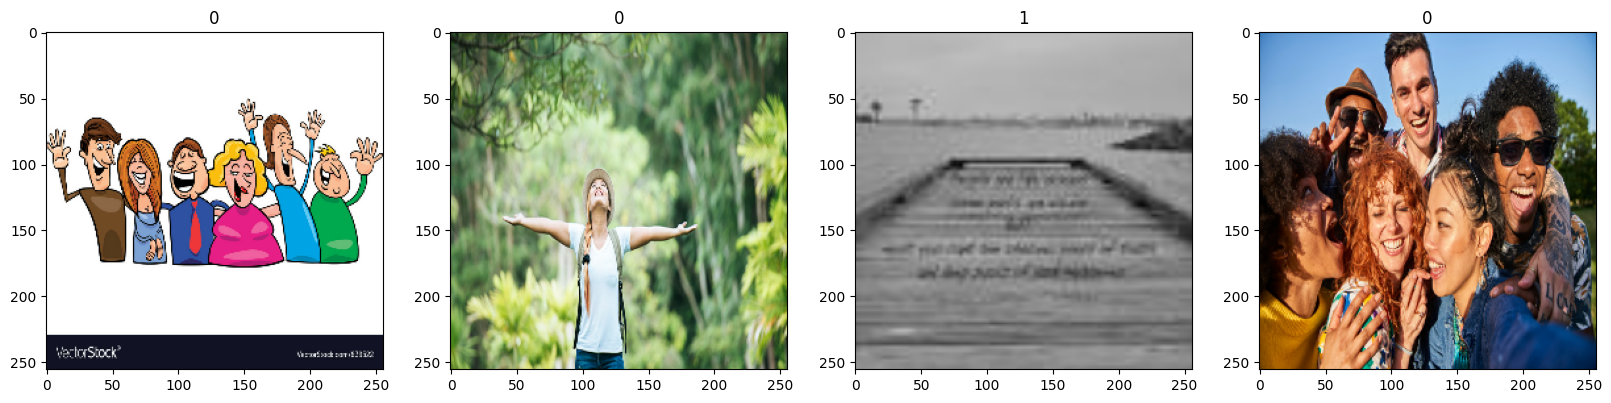

In [81]:
# Plotting firt 4 images from batch -Class 1 =Sad People , Class 0 = Happy People
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 3. Preprocess Data

## 3.1 Scale Data

In [55]:
# Scale the data so every image size is between 0 and 1
data = data.map(lambda x,y: (x/255,y))

In [82]:
batch_iterator = data.as_numpy_iterator()
batch2 = batch_iterator.next()

In [83]:
batch2[0].min()

0.0

In [84]:
batch2[0].max()

1.0

In [85]:
batch[0].shape

(32, 256, 256, 3)

In [86]:
batch2[0].shape

(32, 256, 256, 3)

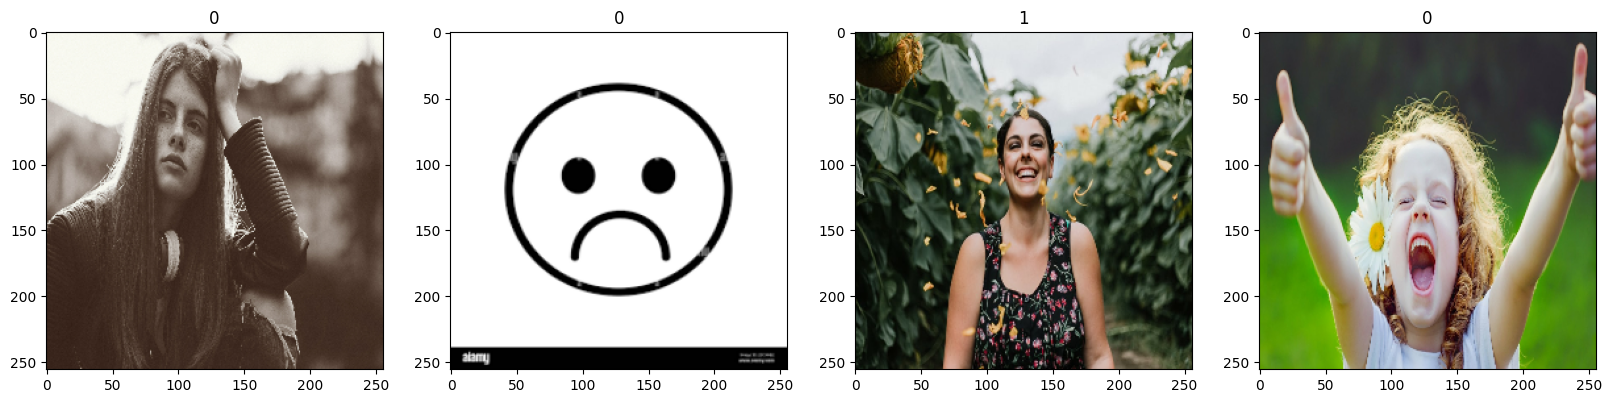

In [87]:
# Plotting firt 4 images from batch -Class 1 =Sad People , Class 0 = Happy People
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch2[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 3.2 Split Data

In [88]:
len(data)

10

In [89]:
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.1)
val_size = int(len(data) * 0.2)


In [90]:
train_size

7

In [91]:
test_size

1

In [92]:
val_size 

2

In [93]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [95]:
len(train) ,len(val),len(test)

(7, 2, 1)

# 4. Deep Model

### 4.1 Build Deep Learning Model

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [97]:
model = Sequential()


In [100]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [101]:
model.compile('adam', loss=tf.losses.BinaryFocalCrossentropy(), metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 16)        2

### 4.2 Train Model

In [103]:
logdir = 'logs'

In [104]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [105]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 14s 2s/step - loss: 0.4685 - accuracy: 0.4955 - val_loss: 0.2406 - val_accuracy: 0.3906
Epoch 2/20
7/7 [==============================] - 12s 2s/step - loss: 0.1744 - accuracy: 0.5491 - val_loss: 0.1642 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.1637 - accuracy: 0.5670 - val_loss: 0.1564 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 12s 2s/step - loss: 0.1441 - accuracy: 0.7455 - val_loss: 0.1423 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 12s 1s/step - loss: 0.1219 - accuracy: 0.7991 - val_loss: 0.1292 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 12s 2s/step - loss: 0.1160 - accuracy: 0.7723 - val_loss: 0.1012 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 12s 2s/step - loss: 0.0880 - accuracy: 0.8750 - val_loss: 0.0890 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

### 4.3 Plot Performance

In [106]:
hist

In [107]:
hist.history

{'loss': [0.4685411751270294,
  0.17439840734004974,
  0.1637154072523117,
  0.14406563341617584,
  0.12193465977907181,
  0.11603699624538422,
  0.08798123151063919,
  0.08600087463855743,
  0.06700225174427032,
  0.061864789575338364,
  0.04826311394572258,
  0.03715835139155388,
  0.030696138739585876,
  0.015447437763214111,
  0.01350771076977253,
  0.013427568599581718,
  0.010685786604881287,
  0.009721512906253338,
  0.006623107474297285,
  0.006899100728332996],
 'accuracy': [0.4955357015132904,
  0.5491071343421936,
  0.5669642686843872,
  0.7455357313156128,
  0.7991071343421936,
  0.7723214030265808,
  0.875,
  0.8348214030265808,
  0.9375,
  0.9196428656578064,
  0.9464285969734192,
  0.9553571343421936,
  0.96875,
  0.9910714030265808,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128,
  0.9910714030265808,
  1.0,
  0.9910714030265808],
 'val_loss': [0.2405788004398346,
  0.16424742341041565,
  0.15644514560699463,
  0.14233073592185974,
  0.1291856169700622

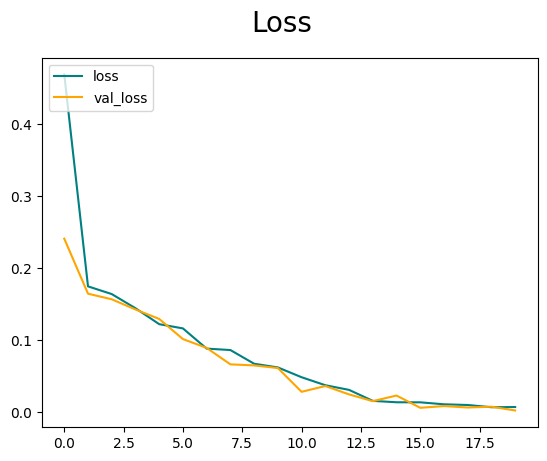

In [108]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

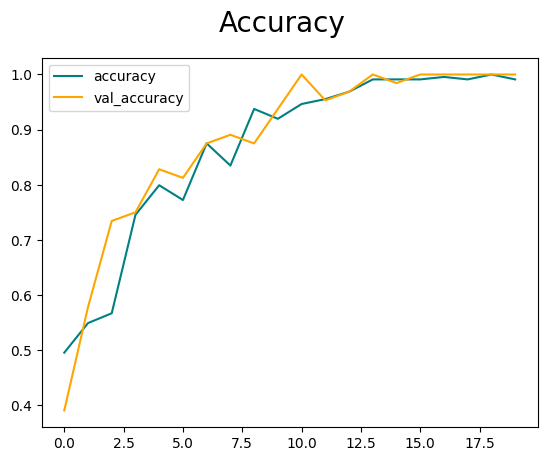

In [109]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()